# Titanic Data Analytics Project

### Analysis and cleaning of the Titanic dataset, focusing on handling missing data and basic visualisation.

#### <u> Step 1: Import Python Libraries</u>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### <u> Step 2: Load the Dataset</u>

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum() #Summary of number of nulls in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### <b>Age, Cabin and Embarked columns have some missing values </b>

#### <u>Step 3: Explore missing Data </u>

In [6]:
print("Missing values per column: \n", df.isnull().sum())

Missing values per column: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Text(0.5, 1.0, 'Missing Data Heatmap')

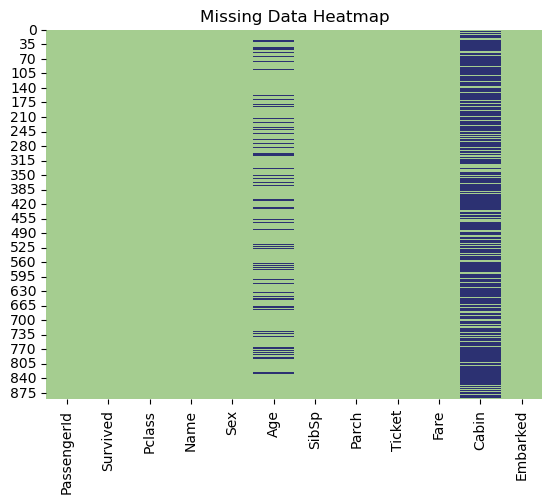

In [7]:
sns.heatmap(df.isnull(),cbar=False,cmap='crest')
plt.title("Missing Data Heatmap")

In [8]:
!pip install missingno #install MissingNo if not already installed

In [9]:
import missingno as msno

<Axes: >

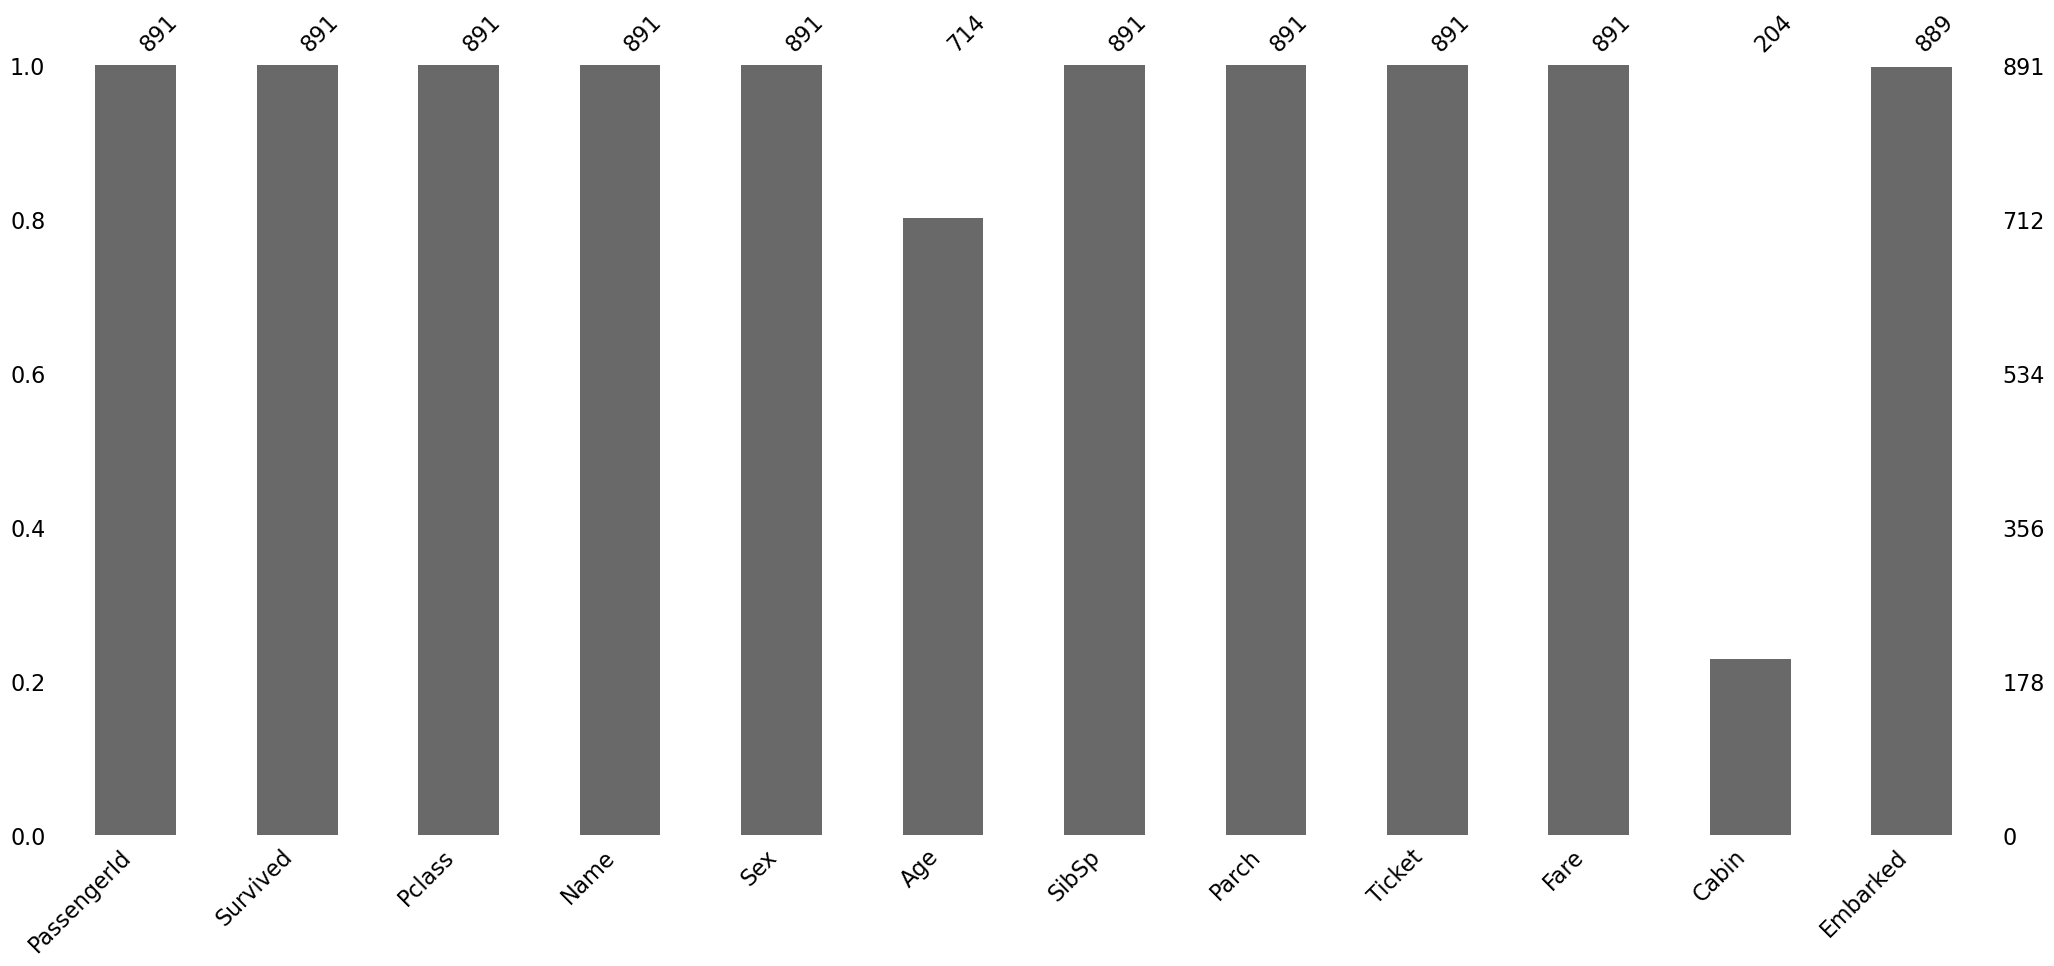

In [10]:
#msno.matrix(df) # matrix graph - useful when many columns have missing values
msno.bar(df) #bar graph

#### <u>Step 4: Handle Missing Data</u>

##### <u>4a: Remove rows with excessive missing data</u>

In [11]:
def bold(text):
    return f"\033[1m{text}\033[0m"
    
percent_missing = df['Cabin'].isnull().sum() / df.shape[0]
print(f"{bold(f'Cabin has {percent_missing:.2%} of data missing, so can be dropped')}")

Cabin has 77.10% of data missing, so can be dropped


In [12]:
df.drop('Cabin', axis =1, inplace =True)

4b: <u>Impute missing "Age" (numerical) with median</u>

In [13]:
median_age = df['Age'].median()
df['Age'].fillna(median_age,inplace=True)

/var/folders/ss/41386xsn6bnccjl1cb_r3lgc0000gn/T/ipykernel_84924/1323624685.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age,inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


4c: <u>Impute missing "Embarked" (categorical) with mode - the most used value</u>

In [15]:
mode_embarked = df['Embarked'].mode()[0] 
#mode()[0] is used instead of just mode() as it picks the first mode value if multiple modes exist

df['Embarked'] = df['Embarked'].fillna(mode_embarked)
# Learning from the above Future warning to assign the new value of df['Embarked'] to itself

4c: <u>Check success of cleaning</u>

In [16]:
print("Missing values per column: \n", df.isnull().sum())

Missing values per column: 
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### <u>Step 5: Basic Data Analysis</u>

5a: <u>Summary Statistics</u>

In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
counts = df['Survived'].value_counts()
counts.index = counts.index.map({0: 'Not survived', 1: 'Survived'})
counts

# Using .map({0: 'Not survived', 1: 'Survived'}) on the index replaces these numeric indices with the descriptive strings

Survived
Not survived    549
Survived        342
Name: count, dtype: int64

5b: <u>Survival by Gender and Pclass</u>

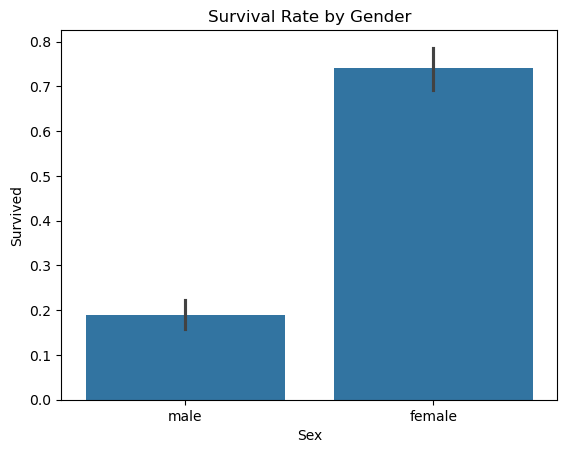

In [19]:
sns.barplot(x='Sex', y='Survived',data=df)
plt.title('Survival Rate by Gender')
plt.show()

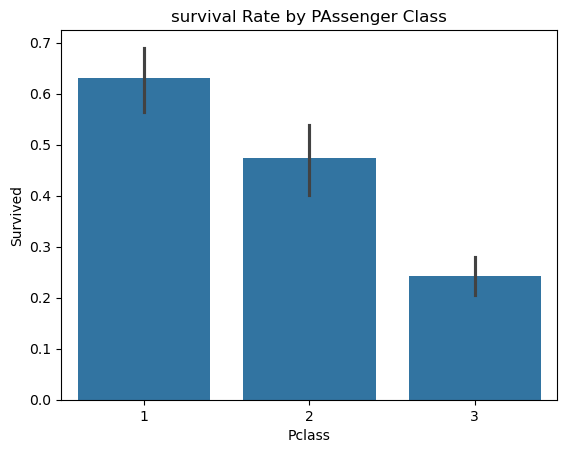

In [20]:
sns.barplot(x='Pclass',y='Survived', data=df)
plt.title('survival Rate by PAssenger Class')
plt.show()

5c: <u>Age Distribution</u>

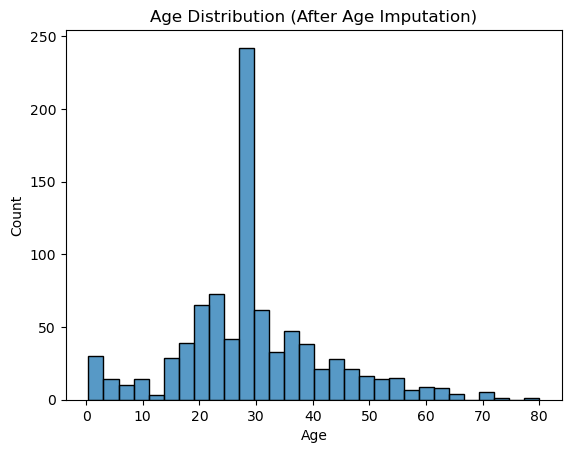

In [21]:
sns.histplot(df['Age'], bins =30)
plt.title('Age Distribution (After Age Imputation)')
plt.show()

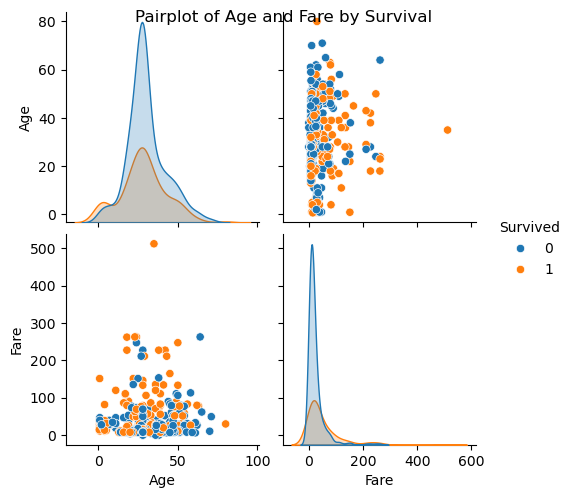

In [22]:
# Visualize relationships across key features (sample 500 for performance)
sns.pairplot(df.sample(500), hue='Survived', vars=['Age', 'Fare'])
plt.suptitle('Pairplot of Age and Fare by Survival')
plt.show()

Interpretation insights:

Denser populations of survivors within specific age ranges, such as younger passengers, indicating higher survival likelihood among the young.

Fare distribution of survivors skews towards higher fare values, indicating passengers who paid more (likely in better classes) had better survival.

The combined scatterplot lets you visually assess if younger passengers paying higher fares had higher survival rates.

#### <u>Step 6: Save cleaned Data</u>

In [23]:
df.to_csv('Titanic_cleaned.csv', index = False)